In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('driver_dataset.csv')

In [3]:
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'Good Driver' else 0)

In [4]:
X = df.drop('Label', axis=1).values
y = df['Label'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
23/23 [==============================] - 0s 18ms/step - loss: 0.0879 - accuracy: 0.9792 - val_loss: 0.0722 - val_accuracy: 1.0000
Epoch 2/50
23/23 [==============================] - 0s 15ms/step - loss: 0.0866 - accuracy: 0.9778 - val_loss: 0.0727 - val_accuracy: 0.9875
Epoch 3/50
23/23 [==============================] - 0s 14ms/step - loss: 0.0852 - accuracy: 0.9792 - val_loss: 0.0715 - val_accuracy: 1.0000
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0840 - accuracy: 0.9819 - val_loss: 0.0710 - val_accuracy: 0.9875
Epoch 5/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0826 - accuracy: 0.9792 - val_loss: 0.0709 - val_accuracy: 0.9750
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.0818 - accuracy: 0.9806 - val_loss: 0.0703 - val_accuracy: 0.9875
Epoch 7/50
23/23 [==============================] - 0s 15ms/step - loss: 0.0805 - accuracy: 0.9806 - val_loss: 0.0677 - val_accuracy: 0.9875
Epoch 8/50
23

In [13]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9850
Test Loss: 0.05475129559636116, Test Accuracy: 0.9850000143051147


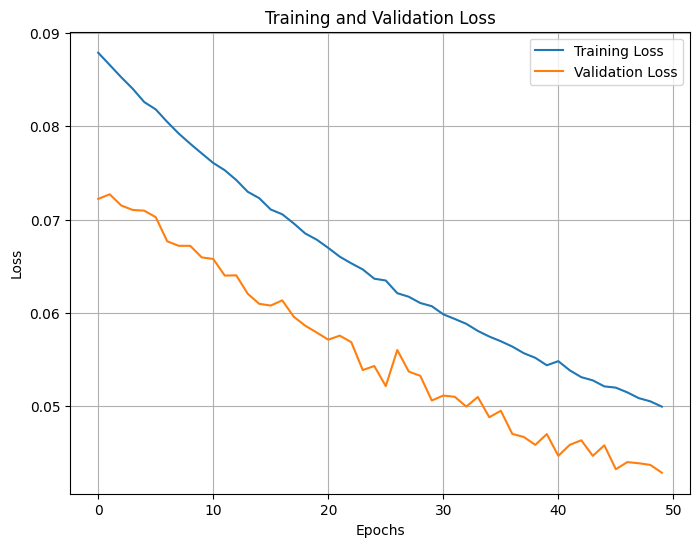

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

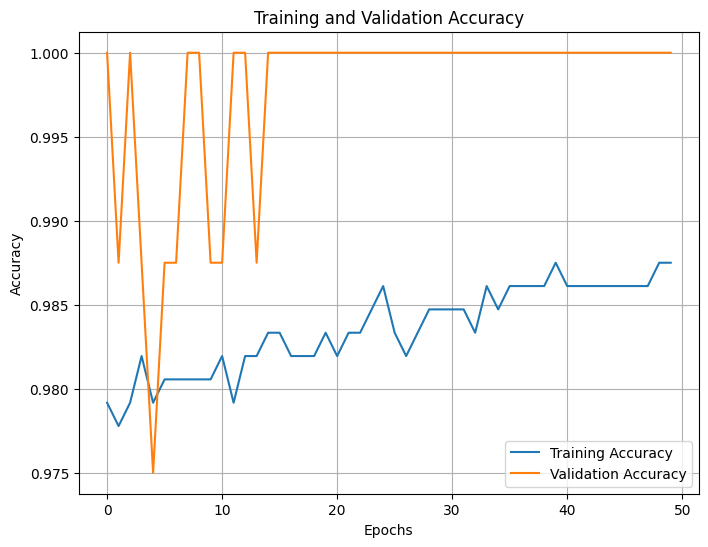

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

##Now to predict that females are good drivers or not

In [17]:
X_female = df.drop(['Label'], axis=1).values
X_female_scaled = scaler.transform(X_female)
predictions = model.predict(X_female_scaled)

32/32 [==============================] - 0s 1ms/step


In [18]:
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

if sum(predicted_labels) >= len(predicted_labels) / 2:
    print("Yes, the majority of females are good drivers.")
else:
    print("No, the majority of females are not good drivers.")

Yes, the majority of females are good drivers.
